# CS530 Homework 6 Part1

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as preproc
from sklearn import pipeline as pipe
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#### Question 1. (4 points)

a. Files 'train.csv' and 'test.csv' contain data for the Heart Disease dataset. Use the scikit-learn package to train a logistic regression model on the training set, train.csv, and predict on the test set, test.csv. The variable that you are predicting is named 'target'. Give an accuracy of your prediction on the test set. You can find the description of the data in 'heart-disease.names' file.


In [3]:
# Your code goes here.

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.drop(train.columns[train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test.drop(test.columns[test.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


X_train = train.drop(['target'], axis = 1)
y_train = train.target

X_test = test.drop(['target'], axis = 1)
y_test = test.target

logreg = LogisticRegression(solver='lbfgs')

logreg.fit(X_train, y_train)
score = logreg.score(X_test, y_test)

print("ACCURACY: ", score)

ACCURACY:  0.868421052631579


/Users/emilydaskas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


b. Use the scikit-learn package to plot an ROC curve of the predictions on the test set from 1a.

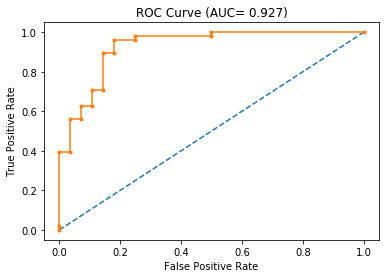

In [8]:
# Your code goes here.

def plotROCWithSciKit(X_test, y_test):
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = logreg.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]

    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker = ".", label = "Logistic")
    plt.title("ROC Curve (AUC= " + "{:.3f}".format(lr_auc) + ")")

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show()
    
plotROCWithSciKit(X_test, y_test)

c. Implement a function to plot the ROC curve of the model you get from on the test set. (Hints: 1. check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) of logistic regression to get the probability output. 2. Loop through a list of probability thresholds for classification and calculate the Specificity and Sensitivity for each threshold value.)

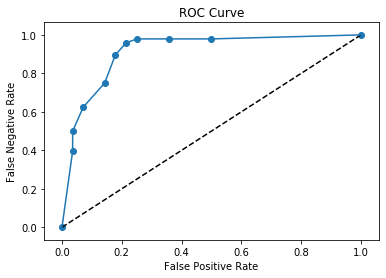

In [5]:
predict_probabilities = logreg.predict_proba(X_test)[:,1]
thresholds = np.linspace(0,1,11)

def roc_curve(predict_probabilities, thresholds):
    
    fprs = []
    tprs = []
    
    for t in thresholds:
        tp = fp = tn = fn = 0
        
        for i in range(len(predict_probabilities)):
            if float(predict_probabilities[i]) > t:
                if y_test[i] == 1:
                    tp += 1
                else:    
                    fp += 1
            else:
                if y_test[i] == 0:
                    tn += 1
                else:    
                    fn += 1
        sensitivity = tp / float(tp+fn)
        specificity = tn / float(tn+fp)

        fprs.append(1 - specificity)
        tprs.append(sensitivity)
        
    plt.scatter(fprs, tprs)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fprs, tprs, label = "Logistic Regression")
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.title('ROC Curve')
    plt.show()
    pass

            
roc_curve(predict_probabilities, thresholds)

#### Question 2 (3 points)

a. Use the same dataset in Question 1 to train a classification model with the LDA algorithm. Give a prediction accuracy on the test set.

In [13]:
clf = LDA()
clf.fit(X_train, y_train)

y_predLDA = clf.predict(X_test)
score = clf.score(X_test, y_test)

print("PREDICTION ON TEST SET: ", score)

PREDICTION ON TEST SET:  0.8552631578947368


b. Plot the ROC curve of the LDA model you trained in 2a on the test set. You can use the scikit-learn package.

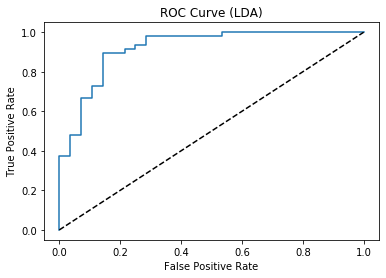

In [14]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
%matplotlib inline

y_pred_LDA = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LDA)
plt.plot(fpr, tpr, label='LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LDA)')
plt.plot([0,1],[0,1], 'k--')
plt.show()




c. Compare the ROC and accuracy on the test set that you get from Questions 1 and 2. Which algorithm performs better on this dataset? Explain your answer and hypothesize why one algorithm might be better than the other on this dataset.

The accuracy was slightly higher for this dataset with logistic regression than with LDA. The curves looked very similar. Thus, it looks like logistic regression performs better on this dataset. This could be because, while LDA is often a more common approach to multi-class classifications, its assumptions are stronger than logistic regressionn's assumptions. Logistic regression does not require assumptions about normally distributed errors or homodescasicity of errors.